In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer
from IPython.core.display import Latex
from IPython.core.display import HTML

In [2]:
path = "/Users/rohitk/Documents/AllDealMinuteDataNew.csv"
df = pd.read_csv(path)

In [3]:
df.columns

Index(['Minutes', 'DATE', 'Time', 'Datetime', 'PRICE', 'dollar', 'midpoint',
       'wEffectiveSpread_Dollar', 'NBO', 'NBB', 'logPrice', 'returns',
       'Volatility', 'DayVolatility', 'Announced', 'AorT', 'Ticker',
       'QuotedSpread', 'timeNum', 'logVolume', 'TradeVolume',
       'logDayVolatility', 'logOfSpread', 'DayReturns', 'DailyLogOfSpread',
       'DailyLogPrice', 'DailyLogVolume', 'DailySpread', 'DailyPrice',
       'DailyDollarVolume', 'DailyLogDollarVolume', 'DailyDollarVolume.1',
       'DailyShareVolume', 'DailyLogShareVolume'],
      dtype='object')

In [12]:
df.describe()

count    717984.000000
mean         -8.130282
std           0.743559
min         -14.621325
25%          -8.636126
50%          -8.309193
75%          -7.723562
max          -3.402047
Name: pctSpread, dtype: float64

In [5]:
# 0 = cash, 1 = stock, 2 = hybrid
df['type'] = 0
df.loc[(df['Ticker'] == 'HRS') | (df['Ticker'] == 'LLL') | (df['Ticker'] == 'SXL') | (df['Ticker'] == 'ETP') | (df['Ticker'] == 'TMUS') | (df['Ticker'] == 'S') | (df['Ticker'] == 'D') | (df['Ticker'] == 'SCG') | (df['Ticker'] == 'WMB') | (df['Ticker'] == 'WPZ') | (df['Ticker'] == 'FISV') | (df['Ticker'] == 'FDC'), 'type'] = 1
df.loc[(df['Ticker'] == 'FIS') | (df['Ticker'] == 'WP') | (df['Ticker'] == 'OXY') | (df['Ticker'] == 'APC') | (df['Ticker'] == 'UTX') | (df['Ticker'] == 'COL') | (df['Ticker'] == 'ADI') | (df['Ticker'] == 'LLTC'), 'type'] = 2

In [6]:
df['pctSpread'] = np.log(df['QuotedSpread'] / df['midpoint'])

In [8]:
df['priceInter'] = df['Announced'] * df['logPrice']
df['volumeInter'] = df['Announced'] * df['logVolume']
df['volatilityInter'] = df['Announced'] * df['logDayVolatility']

In [9]:
#ACQ vs TArgets and remove first 5 and last 5 trading minutes
dfACQ = df[(df['AorT'] == 1) & (df['timeNum'] >= 5) & (df['timeNum'] <= 385)]
dfTAR = df[(df['AorT'] == 0) & (df['timeNum'] >= 5) & (df['timeNum'] <= 385)] 

#TAR and ACQ before and after announcement
dfTARAfter = dfTAR[dfTAR['Announced'] == 1]
dfTARBefore = dfTAR[dfTAR['Announced'] == 0]
dfACQAfter = dfACQ[dfACQ['Announced'] == 1]
dfACQBefore = dfACQ[dfACQ['Announced'] == 0]

In [8]:
# ACQ Minute Regression
regACQ = smf.ols('pctSpread ~ logVolume + logPrice + logDayVolatility + Announced',data=dfACQ).fit(cov_type='HAC',cov_kwds={'maxlags':2})
print(regACQ.summary())

                            OLS Regression Results                            
Dep. Variable:              pctSpread   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     9419.
Date:                Thu, 15 Apr 2021   Prob (F-statistic):               0.00
Time:                        00:27:12   Log-Likelihood:            -2.4281e+05
No. Observations:              355029   AIC:                         4.856e+05
Df Residuals:                  355024   BIC:                         4.857e+05
Df Model:                           4                                         
Covariance Type:                  HAC                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -4.9960      0.020  

In [17]:
# TAR Regression
regTAR = smf.ols('pctSpread ~ logVolume + logPrice + logDayVolatility + Announced',data=dfTAR).fit(cov_type='HAC',cov_kwds={'maxlags':2})
print(regTAR.summary())

                            OLS Regression Results                            
Dep. Variable:              pctSpread   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                 4.344e+04
Date:                Thu, 15 Apr 2021   Prob (F-statistic):               0.00
Time:                        00:37:42   Log-Likelihood:            -3.0026e+05
No. Observations:              346470   AIC:                         6.005e+05
Df Residuals:                  346465   BIC:                         6.006e+05
Df Model:                           4                                         
Covariance Type:                  HAC                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -2.8667      0.015  

In [10]:
dfCashTAR = dfTAR[dfTAR['type'] == 0]
dfHybridTAR = dfTAR[dfTAR['type'] == 2]
dfStockTAR = dfTAR[dfTAR['type'] == 1]

In [11]:
dfCashACQ = dfACQ[dfACQ['type'] == 0]
dfHybridACQ = dfACQ[dfACQ['type'] == 2]
dfStockACQ = dfACQ[dfACQ['type'] == 1]

In [12]:
#TAR cash deals
regTARcash = smf.ols('pctSpread ~ logVolume + logPrice + logDayVolatility + Announced',data=dfCashTAR).fit(cov_type='HAC',cov_kwds={'maxlags':2})
print(regTARcash.summary())

                            OLS Regression Results                            
Dep. Variable:              pctSpread   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                 1.185e+04
Date:                Thu, 15 Apr 2021   Prob (F-statistic):               0.00
Time:                        00:27:18   Log-Likelihood:                -82598.
No. Observations:              117977   AIC:                         1.652e+05
Df Residuals:                  117972   BIC:                         1.653e+05
Df Model:                           4                                         
Covariance Type:                  HAC                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -5.5458      0.031  

In [13]:
# TAR Hybrid Deals
regTARhy = smf.ols('pctSpread ~ logVolume + logPrice + logDayVolatility + Announced',data=dfHybridTAR).fit(cov_type='HAC',cov_kwds={'maxlags':2})
print(regTARhy.summary())

                            OLS Regression Results                            
Dep. Variable:              pctSpread   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     3894.
Date:                Thu, 15 Apr 2021   Prob (F-statistic):               0.00
Time:                        00:27:20   Log-Likelihood:                -51340.
No. Observations:               95202   AIC:                         1.027e+05
Df Residuals:                   95197   BIC:                         1.027e+05
Df Model:                           4                                         
Covariance Type:                  HAC                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -8.1260      0.036  

In [14]:
# Stock TAR deals
regTARstock = smf.ols('pctSpread ~ logVolume + logPrice + logDayVolatility + Announced',data=dfStockTAR).fit(cov_type='HAC',cov_kwds={'maxlags':2})
print(regTARstock.summary())

                            OLS Regression Results                            
Dep. Variable:              pctSpread   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     8334.
Date:                Thu, 15 Apr 2021   Prob (F-statistic):               0.00
Time:                        00:27:24   Log-Likelihood:            -1.0962e+05
No. Observations:              133291   AIC:                         2.192e+05
Df Residuals:                  133286   BIC:                         2.193e+05
Df Model:                           4                                         
Covariance Type:                  HAC                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -2.8344      0.032  

In [19]:
#ACQ cash deals
regACQcash = smf.ols('pctSpread ~ logVolume + logPrice + logDayVolatility + Announced',data=dfCashACQ).fit(cov_type='HAC',cov_kwds={'maxlags':2})
print(regACQcash.summary())

                            OLS Regression Results                            
Dep. Variable:              pctSpread   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     4888.
Date:                Thu, 15 Apr 2021   Prob (F-statistic):               0.00
Time:                        00:58:34   Log-Likelihood:                -57648.
No. Observations:              120880   AIC:                         1.153e+05
Df Residuals:                  120875   BIC:                         1.154e+05
Df Model:                           4                                         
Covariance Type:                  HAC                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -7.8532      0.036  

In [20]:
#ACQ Hybrid deals
regACQhy = smf.ols('pctSpread ~ logVolume + logPrice + logDayVolatility + Announced',data=dfHybridACQ).fit(cov_type='HAC',cov_kwds={'maxlags':2})
print(regACQhy.summary())

                            OLS Regression Results                            
Dep. Variable:              pctSpread   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     633.0
Date:                Thu, 15 Apr 2021   Prob (F-statistic):               0.00
Time:                        00:58:45   Log-Likelihood:                -48499.
No. Observations:               96705   AIC:                         9.701e+04
Df Residuals:                   96700   BIC:                         9.706e+04
Df Model:                           4                                         
Covariance Type:                  HAC                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -7.0497      0.036  

In [21]:
#ACQ Stock deals
regACQstock = smf.ols('pctSpread ~ logVolume + logPrice + logDayVolatility + Announced',data=dfStockACQ).fit(cov_type='HAC',cov_kwds={'maxlags':2})
print(regACQstock.summary())

                            OLS Regression Results                            
Dep. Variable:              pctSpread   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     9998.
Date:                Thu, 15 Apr 2021   Prob (F-statistic):               0.00
Time:                        00:58:46   Log-Likelihood:                -90891.
No. Observations:              137444   AIC:                         1.818e+05
Df Residuals:                  137439   BIC:                         1.818e+05
Df Model:                           4                                         
Covariance Type:                  HAC                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -2.5676      0.029  

In [15]:
stargazer = Stargazer([regTAR, regTARcash,regTARhy,regTARstock])
stargazer.title('Target Spreads Robust Regression')
stargazer.custom_columns(['All Targets','Cash Deals','Cash/Stock Deals','Stock Deals'],[1,1,1,1])
Latex(stargazer.render_latex())

<IPython.core.display.Latex object>

In [22]:
stargazer = Stargazer([regACQ, regACQcash,regACQhy,regACQstock])
stargazer.title('Acquirer Spreads Minute Regression')
stargazer.custom_columns(['All Acquirers','Cash Deals','Cash/Stock Deals','Stock Deals'],[1,1,1,1])
Latex(stargazer.render_latex())

<IPython.core.display.Latex object>

In [24]:
dfTARGroupDate = dfTAR.groupby(['Ticker','Datetime']).mean()
dfACQGroupDate = dfACQ.groupby(['Ticker','Datetime']).mean()
dfTARGroupDate.index.levels[-1].astype('str')
dfACQGroupDate.index.levels[-1].astype('str')

Index(['2016-05-02 09:35:00', '2016-05-02 09:36:00', '2016-05-02 09:37:00',
       '2016-05-02 09:38:00', '2016-05-02 09:39:00', '2016-05-02 09:40:00',
       '2016-05-02 09:41:00', '2016-05-02 09:42:00', '2016-05-02 09:43:00',
       '2016-05-02 09:44:00',
       ...
       '2019-07-31 15:46:00', '2019-07-31 15:47:00', '2019-07-31 15:48:00',
       '2019-07-31 15:49:00', '2019-07-31 15:50:00', '2019-07-31 15:51:00',
       '2019-07-31 15:52:00', '2019-07-31 15:53:00', '2019-07-31 15:54:00',
       '2019-07-31 15:55:00'],
      dtype='object', name='Datetime', length=261663)

In [25]:
AMZN_DT_Arr = dfACQGroupDate.xs('AMZN').index.to_numpy()
WFM_DT_Arr = dfTARGroupDate.xs('WFM').index.to_numpy()
AMZN_DT = np.where(AMZN_DT_Arr == '2017-06-16 09:36:00')[0][0]
WFM_DT = np.where(WFM_DT_Arr == '2017-06-16 09:50:00')[0][0]

FIS_DT_Arr = dfACQGroupDate.xs('FIS').index.to_numpy()
WP_DT_Arr = dfTARGroupDate.xs('WP').index.to_numpy()
FIS_DT = np.where(FIS_DT_Arr == '2019-03-18 09:36:00')[0][0]
WP_DT = np.where(WP_DT_Arr == '2019-03-18 09:36:00')[0][0]

HRS_DT_Arr = dfACQGroupDate.xs('HRS').index.to_numpy()
LLL_DT_Arr = dfTARGroupDate.xs('LLL').index.to_numpy()
HRS_DT = np.where(HRS_DT_Arr == '2018-10-15 09:36:00')[0][0]
LLL_DT = np.where(LLL_DT_Arr == '2018-10-15 09:36:00')[0][0]

IBM_DT_Arr = dfACQGroupDate.xs('IBM').index.to_numpy()
RHT_DT_Arr = dfTARGroupDate.xs('RHT').index.to_numpy()
IBM_DT = np.where(IBM_DT_Arr == '2018-10-29 09:36:00')[0][0]
RHT_DT = np.where(RHT_DT_Arr == '2018-10-29 09:36:00')[0][0]

MSFT_DT_Arr = dfACQGroupDate.xs('MSFT').index.to_numpy()
LNKD_DT_Arr = dfTARGroupDate.xs('LNKD').index.to_numpy()
MSFT_DT = np.where(MSFT_DT_Arr == '2016-06-13 09:36:00')[0][0]
LNKD_DT = np.where(LNKD_DT_Arr == '2016-06-13 09:36:00')[0][0]

OXY_DT_Arr = dfACQGroupDate.xs('OXY').index.to_numpy()
APC_DT_Arr = dfTARGroupDate.xs('APC').index.to_numpy()
OXY_DT = np.where(OXY_DT_Arr == '2019-04-24 09:36:00')[0][0]
APC_DT = np.where(APC_DT_Arr == '2019-04-24 09:36:00')[0][0]

PFE_DT_Arr = dfACQGroupDate.xs('PFE').index.to_numpy()
ARRY_DT_Arr = dfTARGroupDate.xs('ARRY').index.to_numpy()
PFE_DT = np.where(PFE_DT_Arr == '2019-06-17 09:36:00')[0][0]
ARRY_DT = np.where(ARRY_DT_Arr == '2019-06-17 09:36:00')[0][0]

SXL_DT_Arr = dfACQGroupDate.xs('SXL').index.to_numpy()
ETP_DT_Arr = dfTARGroupDate.xs('ETP').index.to_numpy()
SXL_DT = np.where(SXL_DT_Arr == '2016-11-21 09:36:00')[0][0]
ETP_DT = np.where(ETP_DT_Arr == '2016-11-21 09:36:00')[0][0]

TMUS_DT_Arr = dfACQGroupDate.xs('TMUS').index.to_numpy()
S_DT_Arr = dfTARGroupDate.xs('S').index.to_numpy()
TMUS_DT = np.where(TMUS_DT_Arr == '2018-04-30 09:36:00')[0][0]
S_DT = np.where(S_DT_Arr == '2018-04-30 09:36:00')[0][0]

UTX_DT_Arr = dfACQGroupDate.xs('UTX').index.to_numpy()
COL_DT_Arr = dfTARGroupDate.xs('COL').index.to_numpy()
UTX_DT = np.where(UTX_DT_Arr == '2017-09-05 09:36:00')[0][0] #correct for labour day
COL_DT = np.where(COL_DT_Arr == '2017-09-05 09:36:00')[0][0] #correct for labour day

ADI_DT_Arr = dfACQGroupDate.xs('ADI').index.to_numpy()
LLTC_DT_Arr = dfTARGroupDate.xs('LLTC').index.to_numpy()
ADI_DT = np.where(ADI_DT_Arr == '2016-07-26 09:36:00')[0][0]
LLTC_DT = np.where(LLTC_DT_Arr == '2016-07-26 09:36:00')[0][0]

D_DT_Arr = dfACQGroupDate.xs('D').index.to_numpy()
SCG_DT_Arr = dfTARGroupDate.xs('SCG').index.to_numpy()
D_DT = np.where(D_DT_Arr == '2018-01-03 09:36:00')[0][0]
SCG_DT = np.where(SCG_DT_Arr == '2018-01-03 09:36:00')[0][0]

WMB_DT_Arr = dfACQGroupDate.xs('WMB').index.to_numpy()
WPZ_DT_Arr = dfTARGroupDate.xs('WPZ').index.to_numpy()
WMB_DT = np.where(WMB_DT_Arr == '2018-05-17 09:36:00')[0][0]
WPZ_DT = np.where(WPZ_DT_Arr == '2018-05-17 09:36:00')[0][0]

AVGO_DT_Arr = dfACQGroupDate.xs('AVGO').index.to_numpy()
CA_DT_Arr = dfTARGroupDate.xs('CA').index.to_numpy()
AVGO_DT = np.where(AVGO_DT_Arr == '2018-07-12 09:36:00')[0][0] #overnight adjustment
CA_DT = np.where(CA_DT_Arr == '2018-07-12 09:36:00')[0][0] #overnight adjustment

FISV_DT_Arr = dfACQGroupDate.xs('FISV').index.to_numpy()
FDC_DT_Arr = dfTARGroupDate.xs('FDC').index.to_numpy()
FISV_DT = np.where(FISV_DT_Arr == '2019-01-16 09:36:00')[0][0]
FDC_DT = np.where(FDC_DT_Arr == '2019-01-16 09:36:00')[0][0]

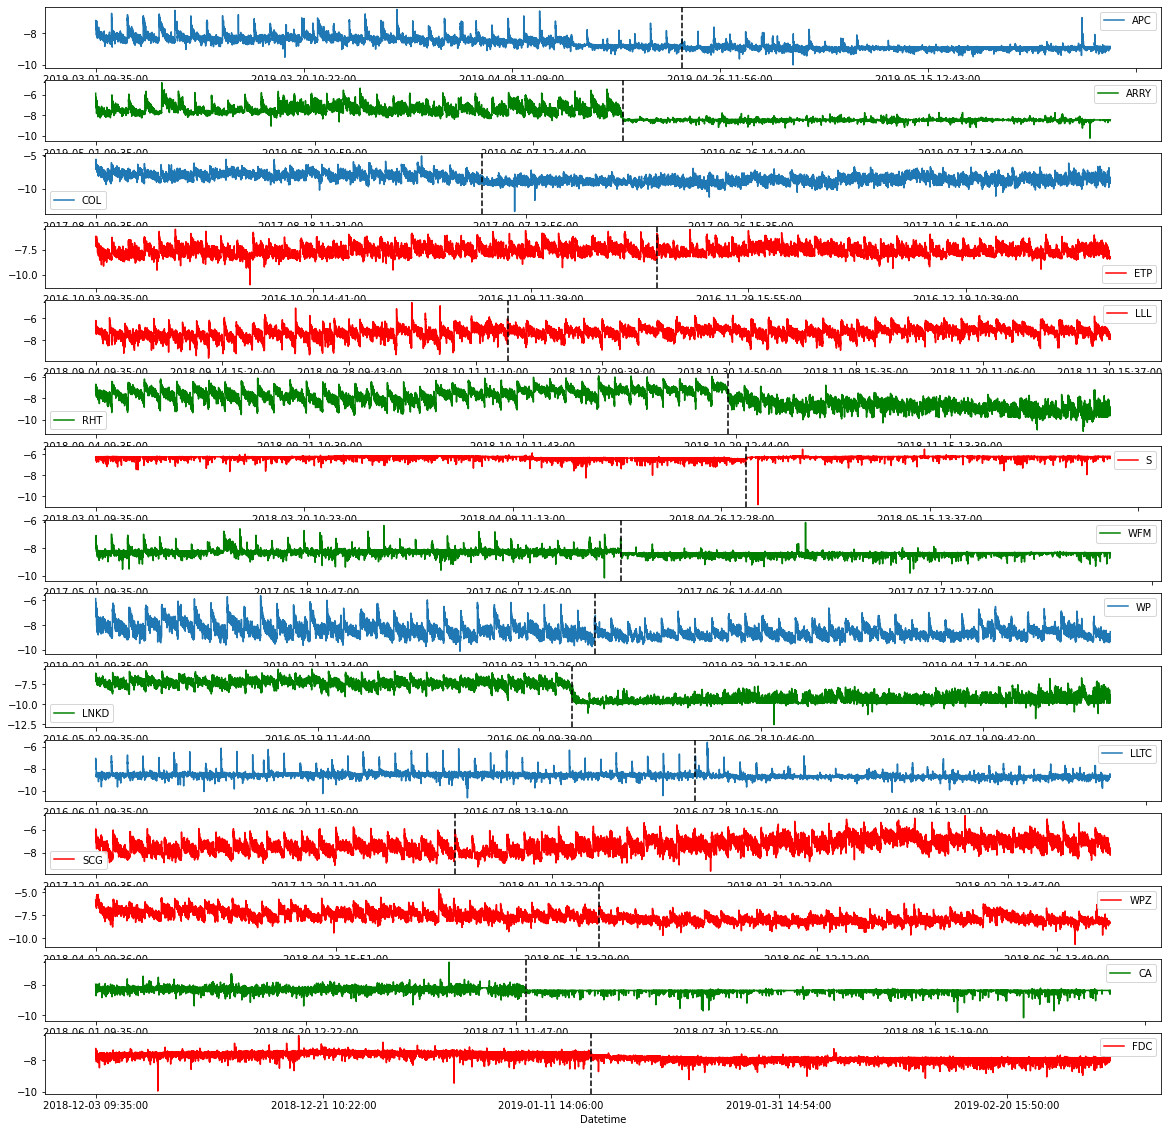

In [22]:
# Plot of Spread over time for TAR by company
f, a = plt.subplots(15,1,figsize=(20,20))
dfTARGroupDate.xs('APC').plot(y='pctSpread',ax=a[0],label='APC')
a[0].axvline(APC_DT, color='k', linestyle='--')

dfTARGroupDate.xs('ARRY').plot(y='pctSpread',ax=a[1],label='ARRY',color='g')
a[1].axvline(ARRY_DT, color='k', linestyle='--')

dfTARGroupDate.xs('COL').plot(y='pctSpread',ax=a[2],label='COL')
a[2].axvline(COL_DT, color='k', linestyle='--')

dfTARGroupDate.xs('ETP').plot(y='pctSpread',ax=a[3],label='ETP',color='r')
a[3].axvline(ETP_DT, color='k', linestyle='--')

dfTARGroupDate.xs('LLL').plot(y='pctSpread',ax=a[4],label='LLL',color='r')
a[4].axvline(LLL_DT, color='k', linestyle='--')

dfTARGroupDate.xs('RHT').plot(y='pctSpread',ax=a[5],label='RHT',color='g')
a[5].axvline(RHT_DT, color='k', linestyle='--')

dfTARGroupDate.xs('S').plot(y='pctSpread',ax=a[6],label='S',color='r')
a[6].axvline(S_DT, color='k', linestyle='--')

dfTARGroupDate.xs('WFM').plot(y='pctSpread',ax=a[7],label='WFM',color='g')
a[7].axvline(WFM_DT, color='k', linestyle='--')

dfTARGroupDate.xs('WP').plot(y='pctSpread',ax=a[8],label='WP')
a[8].axvline(WP_DT, color='k', linestyle='--')

dfTARGroupDate.xs('LNKD').plot(y='pctSpread',ax=a[9],label='LNKD',color='g')
a[9].axvline(LNKD_DT, color='k', linestyle='--')

dfTARGroupDate.xs('LLTC').plot(y='pctSpread',ax=a[10],label='LLTC')
a[10].axvline(LLTC_DT, color='k', linestyle='--')

dfTARGroupDate.xs('SCG').plot(y='pctSpread',ax=a[11],label='SCG',color='r')
a[11].axvline(SCG_DT, color='k', linestyle='--')

dfTARGroupDate.xs('WPZ').plot(y='pctSpread',ax=a[12],label='WPZ',color='r')
a[12].axvline(WPZ_DT, color='k', linestyle='--')

dfTARGroupDate.xs('CA').plot(y='pctSpread',ax=a[13],label='CA',color='g')
a[13].axvline(CA_DT, color='k', linestyle='--')

dfTARGroupDate.xs('FDC').plot(y='pctSpread',ax=a[14],label='FDC',color='r')
a[14].axvline(FDC_DT, color='k', linestyle='--')

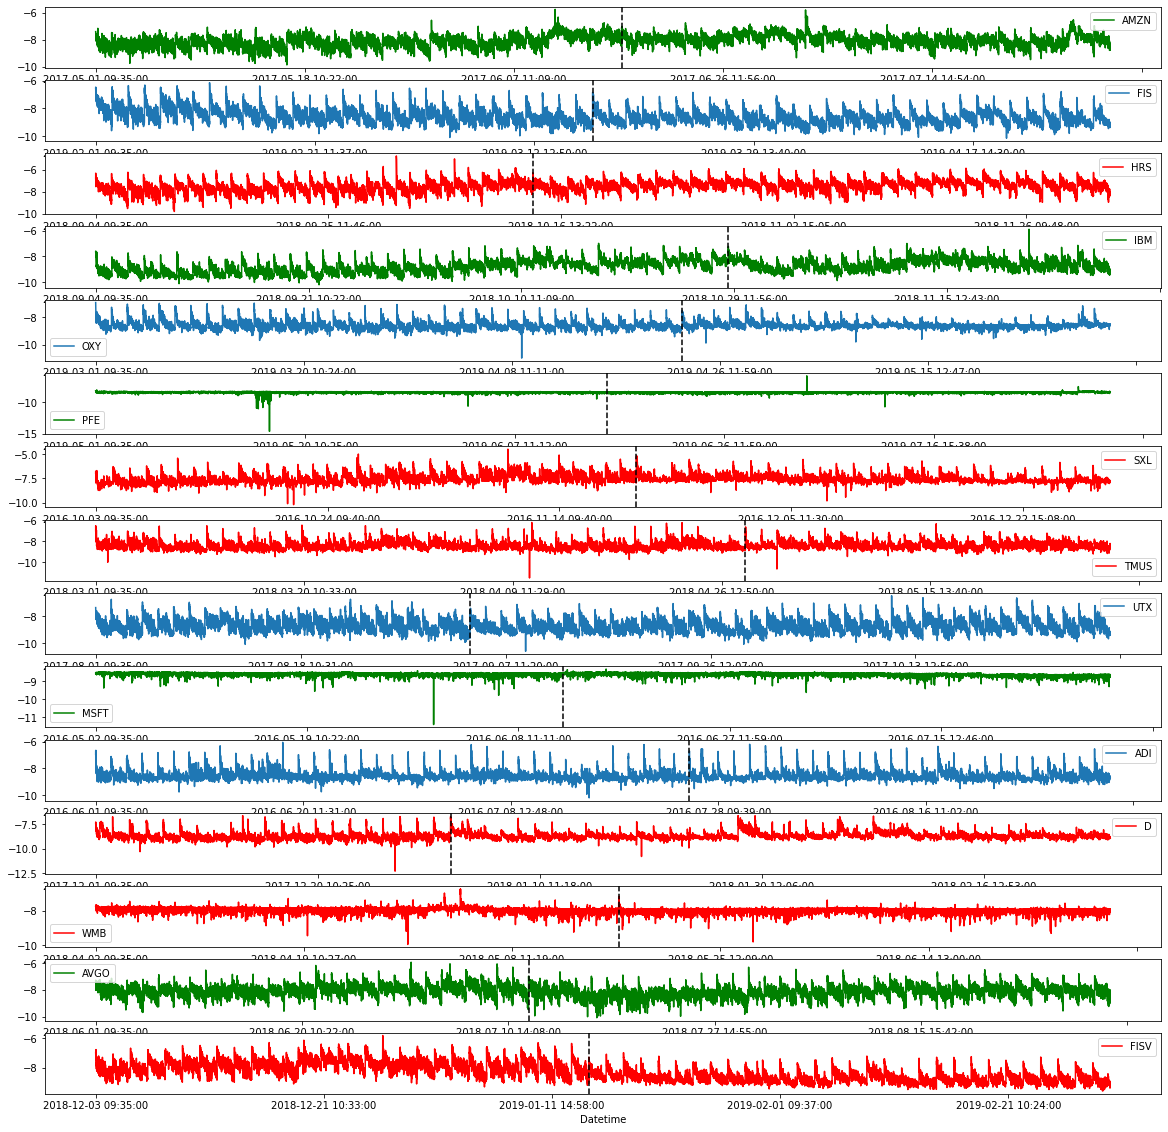

In [26]:
# Plots quoted spread over time for ACQS
f, a = plt.subplots(15,1,figsize=(20,20))
dfACQGroupDate.xs('AMZN').plot(y='pctSpread',ax=a[0],label='AMZN',color='g')
a[0].axvline(AMZN_DT, color='k', linestyle='--')

dfACQGroupDate.xs('FIS').plot(y='pctSpread',ax=a[1],label='FIS')
a[1].axvline(FIS_DT, color='k', linestyle='--')

dfACQGroupDate.xs('HRS').plot(y='pctSpread',ax=a[2],label='HRS', color='r')
a[2].axvline(HRS_DT, color='k', linestyle='--')

dfACQGroupDate.xs('IBM').plot(y='pctSpread',ax=a[3],label='IBM',color='g')
a[3].axvline(IBM_DT, color='k', linestyle='--')

dfACQGroupDate.xs('OXY').plot(y='pctSpread',ax=a[4],label='OXY')
a[4].axvline(OXY_DT, color='k', linestyle='--')

dfACQGroupDate.xs('PFE').plot(y='pctSpread',ax=a[5],label='PFE',color='g')
a[5].axvline(PFE_DT, color='k', linestyle='--')

dfACQGroupDate.xs('SXL').plot(y='pctSpread',ax=a[6],label='SXL',color='r')
a[6].axvline(SXL_DT, color='k', linestyle='--')

dfACQGroupDate.xs('TMUS').plot(y='pctSpread',ax=a[7],label='TMUS',color='r')
a[7].axvline(TMUS_DT, color='k', linestyle='--')

dfACQGroupDate.xs('UTX').plot(y='pctSpread',ax=a[8],label='UTX')
a[8].axvline(UTX_DT, color='k', linestyle='--')

dfACQGroupDate.xs('MSFT').plot(y='pctSpread',ax=a[9],label='MSFT',color='g')
a[9].axvline(MSFT_DT, color='k', linestyle='--')

dfACQGroupDate.xs('ADI').plot(y='pctSpread',ax=a[10],label='ADI')
a[10].axvline(ADI_DT, color='k', linestyle='--')

dfACQGroupDate.xs('D').plot(y='pctSpread',ax=a[11],label='D',color = 'r')
a[11].axvline(D_DT, color='k', linestyle='--')

dfACQGroupDate.xs('WMB').plot(y='pctSpread',ax=a[12],label='WMB',color='r')
a[12].axvline(WMB_DT, color='k', linestyle='--')

dfACQGroupDate.xs('AVGO').plot(y='pctSpread',ax=a[13],label='AVGO',color='g')
a[13].axvline(AVGO_DT, color='k', linestyle='--')

dfACQGroupDate.xs('FISV').plot(y='pctSpread',ax=a[14],label='FISV',color='r')
a[14].axvline(FISV_DT, color='k', linestyle='--')